# Pandas

*Pandas is derived from the term "panel data", an econometrics term for data sets that include observations over multiple time periods for the same individuals. — Wikipedia*

It is said that the pandas package is the most important tool at the disposal of Data Scientists and Analysts working in Python today. It is a Python Library that is highly optimized for performance, with critical code paths written in Cython or C.

The pandas library a central component of the data science toolkit, used in conjunction with other libraries:

1. pandas is built on top of the **NumPy** package
2. data in pandas is often used to feed
- statistical analysis in **SciPy**
- plotting functions from **Matplotlib**
- machine learning algorithms in **Scikit-learn**
3. **Jupyter Notebooks** offer a worthy environment for using pandas to do data exploration and modeling

pandas provides tools for reading and writing data, between in-memory data structures and various formats including: 
- CSV and text files
- Microsoft Excel
- SQL databases
- and the fast HDF5 format


### DataFrames and Series

The primary two components of Pandas are the Series and Data Frame.

The core feature is the fast and efficient **DataFrame** object, a two-dimensional table structure consisting of rows and columns. Essentially a collection of Series.

Each column is an object known as a **Series**, a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the Index.

Both DataFrames and Series support a number of methods for data manipulation with integrated indexing.

DataFrames support:
- intelligent label-based slicing
- fancy indexing
- subsetting of large data sets
- mutability Columns can be inserted and deleted
- Aggregation with a powerful group by engine allowing split-apply-combine operations on data sets
- High performance merging and joining of data sets
- Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure

Time series-functionality includes: 
- date range generation and frequency conversion
- moving window statistics, moving window linear regressions
- date shifting and lagging


### Module structure

For purposes of this training, we will follow these steps:

1. Install or Import pandas
2. Load data into DataFrames
3. Operations in DataFrames
4. Create and format visulations of data


## Install or Import pandas


### Install
In the terminal program (for Mac users) or command line (for PC users), use either of the following commands:

`conda install pandas`

OR

`pip install pandas`


### Import
Customarily, we import as follows:

In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt



## Load Data into DataFrames

pandas loads data by loading data sets into a DataFrame.

Data sets may be loaded from existing storage such as from a SQL Database, .csv file, or Excel file.
pandas I/O API is a set of top level reader functions that generally return a pandas object (for example: `read_csv`). The corresponding writer functions are object methods (for example: `to_csv`).

Ppndas DataFrames can also be created from a single list or a list of lists, dictionary, and from a list of dictionary etc.


### From a File

With .csv files, a single line is required to load data into a DataFrame:

`df = pd.read_csv(file_path, sep=’,’, header=0, index_col=False, names=None)`

- `df` would be replaced by the unique name of the DataFrame

The pandas function: `read_csv` has a plethora of parameters.
The most commonly used parameters include:

- `file_path` would be replaced by the required specific path to a file (a str, pathlib.Path, or *py._path.local.LocalPath*), URL (including http, ftp, and S3 locations), or any object with a read() method (such as an open file or StringIO)

- `sep=’,’` indicates that the data being read is seperated by commas (,). If this is not the case, specify: `sep =" "` (if seperated by a blank space) or `sep='\t'` (if seperated by a tab)

- `header=0` indicates that the names of the columns are in the first row in the file. If this is not the case, specify: `header=None`

- `index_col=False` indicates that the first column of the data is not the Index for the DataFrame, If the first column is an Index, specify: `index_col=True`

- `names=None` indicates that the column names are not being specified and will be inferred from the .csv file. If this is not the case, specify: `header=some_number` so that the specified column names are read and loaded correctly. Alternatively, specify the names in order as this value, seperated by commas


### From a String (Delimited)

It is also possible to load data using a Delimited String.

This is done by making use of the pandas API compatiblity layer: `pandas.compat` and importing the I/O class: `StringIO`

When using the `StringIO` class, ensure imports are according to the Python version in use:
- `from StringIO import StringIO` for Python 2
- `from io import StringIO` for Python 3


_**See example below:**_


In [3]:
from io import StringIO
gen_load = pd.read_csv(StringIO(
"""
Number,Name,Area Name,Nom kV,Load MW,Gen MW
1,ONE,ESKOM,400,0,90
2,TWO,ESKOM,400,0,90
3,THREE,NAMPOWER,400,180,0
"""), index_col = "Number")


Once loaded, the DataFrame can be called by it's name.


_**See example below:**_


In [4]:
gen_load

,Name,Area Name,Nom kV,Load MW,Gen MW
Number,,,,,
1,ONE,ESKOM,400,0,90
2,TWO,ESKOM,400,0,90
3,THREE,NAMPOWER,400,180,0


### Using a List

pandas also facilitates the creation of DataFrame by passing a list of values.

For this, the pandas function `Series` is called.
The result will include a default Integer Index for this Series.
This function will also return identification of the datatype (`dtype`) at the end of the DataFrame.

Some frequently used Series function parameters include:

- `data` : array-like, dictionary, or scalar value. Contains data stored in Series, seperated by a comma, and enclosed with braces `[]`

- `index` : array-like or Index (1d). Values must be hashable and have the same length as data. Non-unique index values are allowed.

- `dtype` : numpy.dtype or None. If None, dtype will be inferred


pandas treats `None` and `NaN` as interchangeable for indicating missing or null values. To list a null value, use: `np.nan`


_**See example below:**_


In [5]:
s = pd.Series([1,3,5,np.nan,6,8])

s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

### Using a Date Range

pandas also facilitates the creation of a DateTime Index by passing a NumPy array.

For this, the pandas function `date_range` is called.
The resulting Series is named `DateTimeIndex` by default.
This function will also return identification of the datatype (`dtype`) as well as the frequency of the values (`freq`).

Some frequently used Date Range function parameters:

- `start` : string or datetime-like, optional. Left bound for generating dates

- `end` : string or datetime-like, optional. Right bound for generating dates

- `periods` : integer, optional. Number of periods to generate

- `freq` : string or DateOffset, default ‘D’ (calendar daily) String can be updated for all calendar options, and also multiples like 7D or 3M


_**See example below:**_


In [6]:
dates = pd.date_range('20190101', periods=6)

dates

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06'],
              dtype='datetime64[ns]', freq='D')


It is now possible to create a DataFrame with a DateTime Index and labeled columns.


_**See example below:**_


In [7]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

df

,A,B,C,D
2019-01-01,0.956117,-1.032206,0.438934,-0.506475
2019-01-02,-0.760846,0.439322,0.589664,-1.868417
2019-01-03,1.265214,-0.376610,-1.398888,0.920866
2019-01-04,-0.410896,0.051450,-0.179588,1.968518
2019-01-05,0.256082,0.390292,0.190941,-1.539745
2019-01-06,0.406453,-0.954979,-1.676651,-0.646808


### Using other series-like options

pandas also facilitates the creation of a DataFrame by passing a dictionary of objects that cane be converted to series-like.

For this, the pandas function `DataFrame` is called.

Some frequently used DataFrame function parameters include:

- `data` : numpy ndarray (structured or homogeneous), dictionary, or DataFrame. Dictionary can contain Series, arrays, constants, or list-like objects

- `index` : Index or array-like. Index to use for resulting DataFrame. Will default to RangeIndex if not provided

- `columns` : Index or array-like. Column labels to use for resulting DataFrame. Will default to RangeIndex if not provided

- `dtype` : dtype, default None. Data type to force. Only a single dtype is allowed. If None, it is inferred


_**See example below:**_


In [8]:
df2 = pd.DataFrame({ 'StartValue' : 1.,
                     'StartDate' : pd.Timestamp('20190102'),
                     'EndValue' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'Activity' : np.array([3] * 4,dtype='int32'),
                     'Action' : pd.Categorical(["test","train","test","train"]),
                     'Response' : 'foo' })
df2

,StartValue,StartDate,EndValue,Activity,Action,Response
0,1.0,2019-01-02,1.0,3,test,foo
1,1.0,2019-01-02,1.0,3,train,foo
2,1.0,2019-01-02,1.0,3,test,foo
3,1.0,2019-01-02,1.0,3,train,foo


## Operations in DataFrames


## Visual References

Especially when working with a new large data set, it is best practice to print out a few attributes of the data set to keep as a visual reference.

A good place to start is with an idea/extract of the DataFrame structure.

It is possble to request either the **top (`.head`) or bottom (`.tail`) rows.**
pandas outputs the first five rows of the DataFrame by default, however the required count may be set as a parameter.


_**See examples below:**_


In [9]:
df.head()

,A,B,C,D
2019-01-01,0.956117,-1.032206,0.438934,-0.506475
2019-01-02,-0.760846,0.439322,0.589664,-1.868417
2019-01-03,1.265214,-0.376610,-1.398888,0.920866
2019-01-04,-0.410896,0.051450,-0.179588,1.968518
2019-01-05,0.256082,0.390292,0.190941,-1.539745


In [10]:
df.tail(3)

,A,B,C,D
2019-01-04,-0.410896,0.051450,-0.179588,1.968518
2019-01-05,0.256082,0.390292,0.190941,-1.539745
2019-01-06,0.406453,-0.954979,-1.676651,-0.646808


By reviewing the top and/or bottom rows of the data set, it may appear that the Dataframe has not been created as expected and/or could be better structured for anticipated analysis. 

To assist, pandas facilitates **transposing** of the data set.

Transpose is the action of writing rows as columns and vice-versa.


_**See example below:**_


In [11]:
df.T

,2019-01-01 00:00:00,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-05 00:00:00,2019-01-06 00:00:00
A,0.956117,-0.760846,1.265214,-0.410896,0.256082,0.406453
B,-1.032206,0.439322,-0.376610,0.051450,0.390292,-0.954979
C,0.438934,0.589664,-1.398888,-0.179588,0.190941,-1.676651
D,-0.506475,-1.868417,0.920866,1.968518,-1.539745,-0.646808


To further assist for presentation, pandas facilitates **sorting** of the data set.

It is possble to sort either by by the Index (`.sort_index`) or by values (`.sort_values`)

Some frequently used function parameters include:

- `by` : string or list of string.

- `axis` : {0 or ‘index’, 1 or ‘columns’}, default 0 Axis to be sorted.

- `ascending` : boolean or list of boolean, default True. Sort ascending vs. descending. Able to specify a list for multiple sort orders.

- `inplace` : boolean, default False. If True, perform operation in-place.



_**See examples below:**_


In [12]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2019-01-01,-0.506475,0.438934,-1.032206,0.956117
2019-01-02,-1.868417,0.589664,0.439322,-0.760846
2019-01-03,0.920866,-1.398888,-0.376610,1.265214
2019-01-04,1.968518,-0.179588,0.051450,-0.410896
2019-01-05,-1.539745,0.190941,0.390292,0.256082
2019-01-06,-0.646808,-1.676651,-0.954979,0.406453


In [13]:
df.sort_values(by='B')

,A,B,C,D
2019-01-01,0.956117,-1.032206,0.438934,-0.506475
2019-01-06,0.406453,-0.954979,-1.676651,-0.646808
2019-01-03,1.265214,-0.376610,-1.398888,0.920866
2019-01-04,-0.410896,0.051450,-0.179588,1.968518
2019-01-05,0.256082,0.390292,0.190941,-1.539745
2019-01-02,-0.760846,0.439322,0.589664,-1.868417


Also, especially when working with a new large data set, it is best practice to print out the **Information Document** to keep as a visual reference.

Running the command `.info()` provides essential details about the data set such as the number of rows and columns, the number of non-null values, what type of data is in each column, and how much memory your DataFrame is using.


_**See example below:**_


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2019-01-01 to 2019-01-06
Freq: D
Data columns (total 4 columns):
A    6 non-null float64
B    6 non-null float64
C    6 non-null float64
D    6 non-null float64
dtypes: float64(4)
memory usage: 400.0 bytes



Alternatively, some details in the data set can be called individually.

These attributes include:

- `.index` will list the Index values

- `.shape` outputs a tuple of (rows, columns)

- `.dtypes` will list the datatypes in force

- `.columns` will list the Column labels and overall datatype


_**See examples below:**_


In [15]:
df.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
df.shape

(6, 4)

In [18]:
df.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

In [19]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

It may be useful when working with a new large data set to create a quick **Statistical Summary** of the data set to also keep as a visual reference.

Running the command `.describe()` provides for the analysis of numeric data. The resulting index will include count, mean, std, min, max as well as lower, 50 and upper percentiles. By default the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median.

For object data (e.g. strings or timestamps), the resulting index will include count, unique, top, and freq. The top is the most common value. The freq is the most common value’s frequency. Timestamps also include the first and last items.

If multiple object values have the highest count, then the count and top results will be arbitrarily chosen from among those with the highest count.


_**See example below:**_


In [20]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.285354,-0.247122,-0.339265,-0.278677
std,0.775225,0.648203,0.968145,1.469270
min,-0.760846,-1.032206,-1.676651,-1.868417
25%,-0.244152,-0.810386,-1.094063,-1.316511
50%,0.331267,-0.162580,0.005677,-0.576642
75%,0.818701,0.305581,0.376936,0.564031
max,1.265214,0.439322,0.589664,1.968518



pandas also facilitates calling only the **values of the data set** as an array.


_**See example below:**_


In [21]:
df.values

array([[ 0.95611654, -1.03220639,  0.43893431, -0.50647478],
       [-0.7608455 ,  0.43932218,  0.58966436, -1.86841744],
       [ 1.26521384, -0.37660973, -1.39888812,  0.92086589],
       [-0.41089619,  0.05144963, -0.17958817,  1.96851809],
       [ 0.25608152,  0.39029189,  0.19094137, -1.53974509],
       [ 0.40645279, -0.95497876, -1.67665123, -0.64680825]])

## Selection

As a DataFrame is a two-dimensional data structure (data is aligned as a table in rows and columns), it is possible to perform basic operations on the rows/columns like selecting, deleting, adding, and renaming.

pandas DataFrames support familiar Python expressions for selecting and setting elements using subsripts `[]` and slicing.
For production code, it may be better to use the optimized pandas data access methods: `.at`, `.iat`, `.loc` and `.iloc`.

**Indexing**

In pandas, Indexing means selecting particular rows and columns of data from a DataFrame. Indexing can also be known as Subset Selection.

The Indexing operator is used to refer to the braces `[]` following an object.

pandas offers 4 methods:

`.at` and `.loc` both provide name-based/label indexing
`.at` provides faster indexing for single element
`.loc` is able to slice more than one element

`.iat` and `.iloc` both provide integer-based/position indexing
`.iat` provides indexing for single element
`.iloc` is able to slice more than one element


### Selection by Label

**Column Selection by Label**


_**See examples below:**_
Notice that all rows in the DataFrame are returned, with column label slicing presented.


In [22]:
df2["EndValue"]

0    1.0
1    1.0
2    1.0
3    1.0
Name: EndValue, dtype: float32

In [23]:
df2[['StartValue','EndValue']]

,StartValue,EndValue
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0


**Row Selection by Label**


_**See example below:**_
Notice that all columns in the DataFrame are returned, with row label slicing presented.
In this example: Those rows on with Index values 2 and 3


In [24]:
df2.loc[2:3]

,StartValue,StartDate,EndValue,Activity,Action,Response
2,1.0,2019-01-02,1.0,3,test,foo
3,1.0,2019-01-02,1.0,3,train,foo


**Multi-Axis Selection by Label**


_**See example below:**_
Notice all rows requested with column label slicing.
Remember that A and B are column labels in the Dataframe `df`, not column positions.


In [25]:
df.loc[:,['A','B']]

,A,B
2019-01-01,0.956117,-1.032206
2019-01-02,-0.760846,0.439322
2019-01-03,1.265214,-0.376610
2019-01-04,-0.410896,0.051450
2019-01-05,0.256082,0.390292
2019-01-06,0.406453,-0.954979



Now showing row and column label slicing, with both endpoints included:



In [26]:
df.loc['20190102':'20190104',['A','B']]

,A,B
2019-01-02,-0.760846,0.439322
2019-01-03,1.265214,-0.376610
2019-01-04,-0.410896,0.051450



It is possible to offer a reduction in the dimensions of the returned object:



In [28]:
df.loc['20190102',['A','B']]

A   -0.760846
B    0.439322
Name: 2019-01-02 00:00:00, dtype: float64

In pandas, a scalar value includes:
- numpy array scalar (e.g. np.int64)
- Python builtin numerics
- Python builtin byte arrays and strings
- None
- datetime.datetime
- datetime.timedelta
- Period
- decimal.Decimal
- Interval
- DateOffset
- Fraction
- Number


_**See example below:**_
A scalar value is being specifically called from the `df` DataFrame, in the first row, under the column labelled: A


In [29]:
df.loc[dates[0],'A']

0.9561165375308105


pandas offers faster access to a scalar value (equivalent to the prior method) by making use of `.at`


_**See example below:**_


In [30]:
df.at[dates[0],'A']

0.9561165375308105

### Selection by Position

**Row Selection by Position**


_**See examples below:**_
Notice that all columns in the DataFrame are returned, with row slicing presented.
The rows on the lines between 0 (inclusive) and less than 3 are presented.


In [31]:
df[0:3]

,A,B,C,D
2019-01-01,0.956117,-1.032206,0.438934,-0.506475
2019-01-02,-0.760846,0.439322,0.589664,-1.868417
2019-01-03,1.265214,-0.376610,-1.398888,0.920866


In this example: The row on the specif third line is presented.


In [32]:
df.iloc[3]

A   -0.410896
B    0.051450
C   -0.179588
D    1.968518
Name: 2019-01-04 00:00:00, dtype: float64

**Multi-Axis Selection by Position**


_**See examples below:**_
By integer slices, acting similar to numpy/python.

In [33]:
df.iloc[3:5,0:2]

,A,B
2019-01-04,-0.410896,0.051450
2019-01-05,0.256082,0.390292


In this example: By lists of integer position locations, similar to the numpy/python style:

In [34]:
 df.iloc[[1,2,4],[0,2]]

,A,C
2019-01-02,-0.760846,0.589664
2019-01-03,1.265214,-1.398888
2019-01-05,0.256082,0.190941


In this example: For slicing rows explicitly


In [143]:
df.iloc[1:3,:]

,A,B,C,D
2019-01-02,-0.401638,-0.146176,-0.794334,1.358901
2019-01-03,-0.611708,0.249950,-0.635933,-1.120556


In this example: For slicing columns explicitly


In [35]:
df.iloc[:,1:3]

,B,C
2019-01-01,-1.032206,0.438934
2019-01-02,0.439322,0.589664
2019-01-03,-0.376610,-1.398888
2019-01-04,0.051450,-0.179588
2019-01-05,0.390292,0.190941
2019-01-06,-0.954979,-1.676651




_**See example below:**_
A scalar value is being specifically called from the `df` DataFrame, in the second row, under the second column

In [36]:
df.iloc[1,1]

0.4393221842458856


pandas offers faster access to a scalar value (equivalent to the prior method) by making use of `.iat`


_**See example below:**_


In [37]:
df.iat[1,1]

0.4393221842458856

### Boolean Indexing

Using a single column’s values to select data.

In [38]:
df[df.A > 0]

,A,B,C,D
2019-01-01,0.956117,-1.032206,0.438934,-0.506475
2019-01-03,1.265214,-0.376610,-1.398888,0.920866
2019-01-05,0.256082,0.390292,0.190941,-1.539745
2019-01-06,0.406453,-0.954979,-1.676651,-0.646808


Selecting values from a DataFrame where a boolean condition is met.

In [39]:
df[df > 0]

,A,B,C,D
2019-01-01,0.956117,NaN,0.438934,NaN
2019-01-02,NaN,0.439322,0.589664,NaN
2019-01-03,1.265214,NaN,NaN,0.920866
2019-01-04,NaN,0.051450,NaN,1.968518
2019-01-05,0.256082,0.390292,0.190941,NaN
2019-01-06,0.406453,NaN,NaN,NaN


Using the isin() method for filtering:

df2 = df.copy()

In [40]:
df2

,StartValue,StartDate,EndValue,Activity,Action,Response
0,1.0,2019-01-02,1.0,3,test,foo
1,1.0,2019-01-02,1.0,3,train,foo
2,1.0,2019-01-02,1.0,3,test,foo
3,1.0,2019-01-02,1.0,3,train,foo


In [41]:
df2['E'] = ['one', 'one','two','three']

In [42]:
df2

,StartValue,StartDate,EndValue,Activity,Action,Response,E
0,1.0,2019-01-02,1.0,3,test,foo,one
1,1.0,2019-01-02,1.0,3,train,foo,one
2,1.0,2019-01-02,1.0,3,test,foo,two
3,1.0,2019-01-02,1.0,3,train,foo,three


In [40]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E,F
2,1.0,2013-01-02,1.0,3,two,foo


## Setting

Setting a new column automatically aligns the data by the indexes.

In [43]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [44]:
df['F'] = s1

### Setting values by label:

In [45]:
df.at[dates[0],'A'] = 0

### Setting values by position:

In [46]:
df.iat[0,1] = 0

Setting by assigning with a NumPy array:

In [47]:
df.loc[:,'D'] = np.array([5] * len(df))

The result of the prior setting operations.

In [48]:
df

,A,B,C,D,F
2019-01-01,0.000000,0.000000,0.438934,5,NaN
2019-01-02,-0.760846,0.439322,0.589664,5,NaN
2019-01-03,1.265214,-0.376610,-1.398888,5,NaN
2019-01-04,-0.410896,0.051450,-0.179588,5,NaN
2019-01-05,0.256082,0.390292,0.190941,5,NaN
2019-01-06,0.406453,-0.954979,-1.676651,5,NaN


A where operation with setting.

In [49]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2019-01-01,0.000000,0.000000,-0.438934,-5,NaN
2019-01-02,-0.760846,-0.439322,-0.589664,-5,NaN
2019-01-03,-1.265214,-0.376610,-1.398888,-5,NaN
2019-01-04,-0.410896,-0.051450,-0.179588,-5,NaN
2019-01-05,-0.256082,-0.390292,-0.190941,-5,NaN
2019-01-06,-0.406453,-0.954979,-1.676651,-5,NaN


### Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

To drop any rows that have missing data.

In [50]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2019-01-01,0.000000,0.000000,0.438934,5,NaN,1.0
2019-01-02,-0.760846,0.439322,0.589664,5,NaN,1.0
2019-01-03,1.265214,-0.376610,-1.398888,5,NaN,NaN
2019-01-04,-0.410896,0.051450,-0.179588,5,NaN,NaN


In [51]:
df1.dropna(how='any')

,A,B,C,D,F,E


Filling missing data.

In [52]:
df1.fillna(value=5)

,A,B,C,D,F,E
2019-01-01,0.000000,0.000000,0.438934,5,5.0,1.0
2019-01-02,-0.760846,0.439322,0.589664,5,5.0,1.0
2019-01-03,1.265214,-0.376610,-1.398888,5,5.0,5.0
2019-01-04,-0.410896,0.051450,-0.179588,5,5.0,5.0


To get the boolean mask where values are nan.

In [53]:
pd.isna(df1)

,A,B,C,D,F,E
2019-01-01,False,False,False,False,True,False
2019-01-02,False,False,False,False,True,False
2019-01-03,False,False,False,False,True,True
2019-01-04,False,False,False,False,True,True


## Operations

See the Basic section on Binary Ops.
Stats

Operations in general exclude missing data.

Performing a descriptive statistic:

In [54]:
df.mean()

A    0.126001
B   -0.075087
C   -0.339265
D    5.000000
F         NaN
dtype: float64

Same operation on the other axis:

In [55]:
df.mean(1)

2019-01-01    1.359734
2019-01-02    1.317035
2019-01-03    1.122429
2019-01-04    1.115241
2019-01-05    1.459329
2019-01-06    0.693706
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [56]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2019-01-01    NaN
2019-01-02    NaN
2019-01-03    1.0
2019-01-04    3.0
2019-01-05    5.0
2019-01-06    NaN
Freq: D, dtype: float64

In [57]:
df.sub(s, axis='index')

,A,B,C,D,F
2019-01-01,NaN,NaN,NaN,NaN,NaN
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,0.265214,-1.376610,-2.398888,4.0,NaN
2019-01-04,-3.410896,-2.948550,-3.179588,2.0,NaN
2019-01-05,-4.743918,-4.609708,-4.809059,0.0,NaN
2019-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

Applying functions to the data:

In [58]:
df.apply(np.cumsum)

,A,B,C,D,F
2019-01-01,0.000000,0.000000,0.438934,5,NaN
2019-01-02,-0.760846,0.439322,1.028599,10,NaN
2019-01-03,0.504368,0.062712,-0.370289,15,NaN
2019-01-04,0.093472,0.114162,-0.549878,20,NaN
2019-01-05,0.349554,0.504454,-0.358936,25,NaN
2019-01-06,0.756006,-0.450525,-2.035587,30,NaN


In [59]:
df.apply(lambda x: x.max() - x.min())

A    2.026059
B    1.394301
C    2.266316
D    0.000000
F         NaN
dtype: float64

### Histogramming

In [60]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    0
1    1
2    3
3    4
4    0
5    3
6    3
7    0
8    5
9    0
dtype: int64

In [61]:
In [70]: s.value_counts()

0    4
3    3
5    1
4    1
1    1
dtype: int64

### String Methods

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses regular expressions by default (and in some cases always uses them). See more at Vectorized String Methods.

In [62]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the Merging section.

Concatenating pandas objects together with concat():

In [63]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.557924,-0.972772,-0.159065,-0.661444
1,-1.989341,-0.152270,-0.707530,0.419379
2,0.501174,0.306278,-0.976252,-0.966184
3,0.167567,0.991156,0.559321,-1.409765
4,-1.430027,0.618852,0.033362,-0.434787
5,0.698621,-0.293608,1.737860,0.078284
6,-0.510055,0.727294,0.838243,-0.606228
7,0.397385,-0.309337,-0.543780,0.204003
8,0.594642,-1.512101,-0.128887,-1.117685
9,0.570404,-0.178463,0.733679,-0.401653


## break it into pieces

In [64]:
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.557924,-0.972772,-0.159065,-0.661444
1,-1.989341,-0.152270,-0.707530,0.419379
2,0.501174,0.306278,-0.976252,-0.966184
3,0.167567,0.991156,0.559321,-1.409765
4,-1.430027,0.618852,0.033362,-0.434787
5,0.698621,-0.293608,1.737860,0.078284
6,-0.510055,0.727294,0.838243,-0.606228
7,0.397385,-0.309337,-0.543780,0.204003
8,0.594642,-1.512101,-0.128887,-1.117685
9,0.570404,-0.178463,0.733679,-0.401653


## Join

SQL style merges. See the Database style joining section.

In [65]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [66]:
right

,key,rval
0,foo,4
1,foo,5


In [67]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another example that can be given is:

In [68]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,bar,2


In [69]:
right

,key,rval
0,foo,4
1,bar,5


In [68]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Append

Append rows to a dataframe. See the Appending section.

In [70]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,0.544231,-1.050928,0.439796,1.146124
1,0.224105,1.036140,-0.301322,-0.997301
2,0.560074,1.416237,0.336955,-0.786338
3,0.268517,-0.340188,0.986062,-0.274331
4,-0.174830,0.266651,0.005742,0.638527
5,1.535344,0.752765,-0.306680,0.751732
6,0.048544,-0.785206,-0.885304,-0.132738
7,0.184570,-2.199417,0.079006,-0.749094


In [71]:
s = df.iloc[3]

In [71]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.164617,1.348608,0.733276,1.847550
1,-0.516412,-0.121454,0.935046,-1.059122
2,2.081901,-0.342760,0.689305,-0.356249
3,-0.290751,0.673046,-2.081423,0.453755
4,-0.374523,-1.894054,0.381905,-0.816777
5,-1.327771,0.393535,0.310007,-0.175454
6,1.224908,0.881037,0.305206,-2.663991
7,0.324994,0.411670,1.215935,-0.780445
8,-0.290751,0.673046,-2.081423,0.453755


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

 - Splitting the data into groups based on some criteria
 - Applying a function to each group independently
 - Combining the results into a data structure

In [72]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                           'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
 

df

,A,B,C,D
0,foo,one,0.517722,0.359722
1,bar,one,2.082907,-1.635093
2,foo,two,-0.972578,0.227927
3,bar,three,-1.521859,0.534451
4,foo,two,-0.111811,0.565303
5,bar,two,-0.875947,0.533002
6,foo,one,-1.934433,1.763348
7,foo,three,0.182616,-1.142041


Grouping and then applying the sum() function to the resulting groups.

In [73]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.314899,-0.56764
foo,-2.318483,1.77426


Grouping by multiple columns forms a hierarchical index, and again we can apply the sum function.

In [74]:
 df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    2.082907 -1.635093
    three -1.521859  0.534451
    two   -0.875947  0.533002
foo one   -1.416711  2.123071
    three  0.182616 -1.142041
    two   -1.084388  0.793231

## Reshaping

In [75]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                      'foo', 'foo', 'qux', 'qux'],
                     ['one', 'two', 'one', 'two',
                      'one', 'two', 'one', 'two']]))
 

index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one     2.982610 -0.720779
      two     0.282589 -0.814030
baz   one     0.994712  1.338161
      two    -0.432545 -0.291692

The stack() method “compresses” a level in the DataFrame’s columns.

In [76]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    2.982610
               B   -0.720779
       two     A    0.282589
               B   -0.814030
baz    one     A    0.994712
               B    1.338161
       two     A   -0.432545
               B   -0.291692
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:

In [77]:
stacked.unstack()

A         B
first second                    
bar   one     2.982610 -0.720779
      two     0.282589 -0.814030
baz   one     0.994712  1.338161
      two    -0.432545 -0.291692

In [78]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.952764  1.137138
      B  1.125149 -0.772433
baz   A  1.138296  2.011791
      B  1.101367 -0.145028

In [78]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  2.982610  0.994712
       B -0.720779  1.338161
two    A  0.282589 -0.432545
       B -0.814030 -0.291692

## Pivot Tables

In [79]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                    'B' : ['A', 'B', 'C'] * 4,
                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                    'D' : np.random.randn(12),
                    'E' : np.random.randn(12)})
 

df

,A,B,C,D,E
0,one,A,foo,0.995587,-0.801567
1,one,B,foo,-0.282833,0.606848
2,two,C,foo,0.413492,-0.042246
3,three,A,bar,-0.098522,1.308152
4,one,B,bar,0.489756,1.036839
5,one,C,bar,0.517123,1.405886
6,two,A,foo,0.727341,0.898016
7,three,B,foo,0.105102,-1.147619
8,one,C,foo,0.917842,-1.934393
9,one,A,bar,-0.125944,1.757077


We can produce pivot tables from this data very easily:

In [80]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.125944  0.995587
      B  0.489756 -0.282833
      C  0.517123  0.917842
three A -0.098522       NaN
      B       NaN  0.105102
      C  2.713632       NaN
two   A       NaN  0.727341
      B  0.829014       NaN
      C       NaN  0.413492

## Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the Time Series section.

In [81]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    26296
Freq: 5T, dtype: int64

### Time zone representation:

In [82]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -0.167479
2012-03-07    0.492722
2012-03-08    0.493252
2012-03-09   -0.635480
2012-03-10    0.227278
Freq: D, dtype: float64

In [84]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -0.167479
2012-03-07 00:00:00+00:00    0.492722
2012-03-08 00:00:00+00:00    0.493252
2012-03-09 00:00:00+00:00   -0.635480
2012-03-10 00:00:00+00:00    0.227278
Freq: D, dtype: float64

### Converting to another time zone:

In [85]:
ts_utc.tz_convert('Africa/Johannesburg')

2012-03-06 02:00:00+02:00   -0.167479
2012-03-07 02:00:00+02:00    0.492722
2012-03-08 02:00:00+02:00    0.493252
2012-03-09 02:00:00+02:00   -0.635480
2012-03-10 02:00:00+02:00    0.227278
Freq: D, dtype: float64

### Converting between time span representations:

In [86]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.160381
2012-02-29   -0.243733
2012-03-31    0.635323
2012-04-30    0.394849
2012-05-31   -0.539082
Freq: M, dtype: float64

In [87]:
ps = ts.to_period()
ps

2012-01   -0.160381
2012-02   -0.243733
2012-03    0.635323
2012-04    0.394849
2012-05   -0.539082
Freq: M, dtype: float64

In [88]:
ps.to_timestamp()

2012-01-01   -0.160381
2012-02-01   -0.243733
2012-03-01    0.635323
2012-04-01    0.394849
2012-05-01   -0.539082
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [89]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00   -0.534207
1990-06-01 09:00    1.178831
1990-09-01 09:00   -0.786230
1990-12-01 09:00   -1.085617
1991-03-01 09:00   -0.761091
Freq: H, dtype: float64

## Categoricals

pandas can include categorical data in a DataFrame. For full docs, see the categorical introduction and the API documentation.

In [90]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

Convert the raw grades to a categorical data type.

In [91]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!).

In [92]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series by default).

In [93]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [94]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories, not lexical order.

In [95]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [95]:
help(pd.DataFrame.sort_values)

Help on function sort_values in module pandas.core.frame:

sort_values(self, by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
    Sort by the values along either axis
    
    Parameters
    ----------
            by : str or list of str
                Name or list of names to sort by.
    
                - if `axis` is 0 or `'index'` then `by` may contain index
                  levels and/or column labels
                - if `axis` is 1 or `'columns'` then `by` may contain column
                  levels and/or index labels
    
                .. versionchanged:: 0.23.0
                   Allow specifying index or column level names.
    axis : {0 or 'index', 1 or 'columns'}, default 0
         Axis to be sorted
    ascending : bool or list of bool, default True
         Sort ascending vs. descending. Specify list for multiple sort
         orders.  If this is a list of bools, must match the length of
         the by.
    inplace : bool, default Fa

Grouping by a categorical column also shows empty categories.

In [96]:
df.groupby("grade").size() 

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting


See Matplotlib laters.

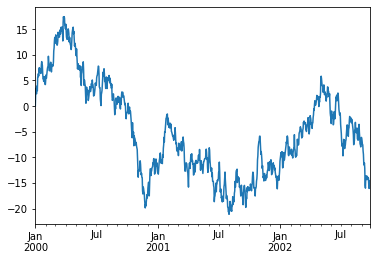

In [97]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

On a DataFrame, the plot() method is a convenience to plot all of the columns with labels:

<Figure size 432x288 with 0 Axes>

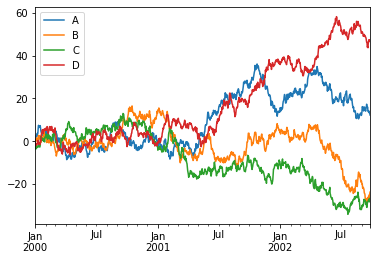

In [98]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

## File IO
### Writing to a csv file.

In [99]:
df.to_csv('foo.csv')

### Reading from a csv file.

In [100]:
pd.read_csv('foo.csv')[:10]

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.829694,0.353654,-0.494838,0.670937
1,2000-01-02,0.245733,-0.378587,-3.176370,-1.424600
2,2000-01-03,1.408079,1.134060,-3.681057,-1.140928
3,2000-01-04,2.647657,1.321860,-2.556247,-2.035137
4,2000-01-05,2.915437,1.445846,-3.105141,-1.204797
5,2000-01-06,2.264597,1.522187,-3.090975,-1.168333
6,2000-01-07,3.649145,0.133032,-2.494192,-1.340362
7,2000-01-08,3.274496,0.550697,-2.332318,-1.041469
8,2000-01-09,3.890258,0.865855,-2.222276,0.274918
9,2000-01-10,6.257403,0.779333,-2.693971,0.332886


### HDF5

Reading and writing to HDFStores.

### Writing to a HDF5 Store.

In [101]:
df.to_hdf('foo.h5','df')

### Reading from a HDF5 Store.

In [102]:
pd.read_hdf('foo.h5','df')[:10]

,A,B,C,D
2000-01-01,0.829694,0.353654,-0.494838,0.670937
2000-01-02,0.245733,-0.378587,-3.176370,-1.424600
2000-01-03,1.408079,1.134060,-3.681057,-1.140928
2000-01-04,2.647657,1.321860,-2.556247,-2.035137
2000-01-05,2.915437,1.445846,-3.105141,-1.204797
2000-01-06,2.264597,1.522187,-3.090975,-1.168333
2000-01-07,3.649145,0.133032,-2.494192,-1.340362
2000-01-08,3.274496,0.550697,-2.332318,-1.041469
2000-01-09,3.890258,0.865855,-2.222276,0.274918
2000-01-10,6.257403,0.779333,-2.693971,0.332886


## Excel

Reading and writing to MS Excel.

### Writing to an excel file.

In [103]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

### Reading from an excel file.

In [104]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])[:10]

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.829694,0.353654,-0.494838,0.670937
1,2000-01-02,0.245733,-0.378587,-3.176370,-1.424600
2,2000-01-03,1.408079,1.134060,-3.681057,-1.140928
3,2000-01-04,2.647657,1.321860,-2.556247,-2.035137
4,2000-01-05,2.915437,1.445846,-3.105141,-1.204797
5,2000-01-06,2.264597,1.522187,-3.090975,-1.168333
6,2000-01-07,3.649145,0.133032,-2.494192,-1.340362
7,2000-01-08,3.274496,0.550697,-2.332318,-1.041469
8,2000-01-09,3.890258,0.865855,-2.222276,0.274918
9,2000-01-10,6.257403,0.779333,-2.693971,0.332886


## Gotchas

If you are attempting to perform an operation you might see an exception like:

In [105]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

References

- https://pandas.pydata.org/
- https://datapythonista.github.io/pandas-doc-preview/whatsnew/v0.24.0.html
- https://towardsdatascience.com/a-guide-to-pandas-and-matplotlib-for-data-exploration-56fad95f951c
- https://www.geeksforgeeks.org/python-pandas-dataframe/
- https://towardsdatascience.com/21-pandas-operations-for-absolute-beginners-5653e54f4cda
- https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/
- https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/
